In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('E:/DSCO/datasets/train.csv')
df_test = pd.read_csv('E:/DSCO/datasets/test.csv')

In [3]:
display(df_train.head())
display(df_test.head())

,URL,url_length,has_ip_address,dot_count,https_flag,url_entropy,token_count,subdomain_count,query_param_count,tld_length,path_length,has_hyphen_in_domain,number_of_digits,tld_popularity,suspicious_file_extension,domain_name_length,percentage_numeric_chars,ClassLabel
0,https://www.womensweekly.com.sg,31,0,3,1,3.461320,6.0,2,1,2,0.00000,0,0,0,0,3,0.000000,1.0
1,http://116.53.34.145:34075/i,28,1,3,0,3.645593,7.0,2,1,9,2.00000,0,15,0,0,2,53.571429,0.0
2,http://58.23.215.31:8765/wzoptup.exe,36,1,4,0,4.086049,8.0,2,1,7,11.44075,0,13,0,1,3,36.111111,0.0
3,https://www.dudpro.co.il,24,0,3,1,3.772055,6.0,2,1,2,0.00000,0,0,0,0,2,0.000000,1.0
4,http://117.201.113.115:53518/i,30,1,3,0,3.819549,11.2,2,1,9,2.00000,0,17,0,0,3,0.371737,0.0


,ID,URL,url_length,has_ip_address,dot_count,https_flag,url_entropy,token_count,subdomain_count,query_param_count,tld_length,path_length,has_hyphen_in_domain,number_of_digits,tld_popularity,suspicious_file_extension,domain_name_length,percentage_numeric_chars
0,1,https://www.fastpost.com,24,0,2,1,3.522055,5.917567,2,1,3,0.000000,0,0,1,0,3,0.000000
1,2,http://proxy.amazonscouts.com/revada/66df1acad...,62,0,3,0,3.812500,8.000000,1,1,3,33.000000,0,7,1,1,0,7.194527
2,3,http://42.179.239.133:58058/bin.sh,34,1,4,0,3.695947,8.000000,2,1,9,6.673771,0,16,0,0,3,47.058824
3,4,https://www.saddhamma.org,25,0,2,1,3.703465,5.917567,1,1,3,0.000000,0,0,0,0,9,0.000000
4,5,https://www.changeip.com,24,0,2,1,3.723800,5.000000,1,1,3,0.000000,0,0,1,0,8,0.000000


## **EDA**

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80974 entries, 0 to 80973
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        80974 non-null  object 
 1   url_length                 80974 non-null  int64  
 2   has_ip_address             80974 non-null  int64  
 3   dot_count                  80974 non-null  int64  
 4   https_flag                 80974 non-null  int64  
 5   url_entropy                80974 non-null  float64
 6   token_count                80974 non-null  float64
 7   subdomain_count            80974 non-null  int64  
 8   query_param_count          80974 non-null  int64  
 9   tld_length                 80974 non-null  int64  
 10  path_length                80974 non-null  float64
 11  has_hyphen_in_domain       80974 non-null  int64  
 12  number_of_digits           80974 non-null  int64  
 13  tld_popularity             80974 non-null  int

In [5]:
df_train.nunique()

URL                          80755
url_length                     227
has_ip_address                   2
dot_count                       18
https_flag                       2
url_entropy                   9926
token_count                     85
subdomain_count                  7
query_param_count                9
tld_length                      11
path_length                    354
has_hyphen_in_domain             2
number_of_digits               109
tld_popularity                   2
suspicious_file_extension        2
domain_name_length              35
percentage_numeric_chars      1839
ClassLabel                       2
dtype: int64

In [6]:
print(df_train.isnull().sum())
print("Duplicated data:", df_train.duplicated().sum())

URL                          0
url_length                   0
has_ip_address               0
dot_count                    0
https_flag                   0
url_entropy                  0
token_count                  0
subdomain_count              0
query_param_count            0
tld_length                   0
path_length                  0
has_hyphen_in_domain         0
number_of_digits             0
tld_popularity               0
suspicious_file_extension    0
domain_name_length           0
percentage_numeric_chars     0
ClassLabel                   0
dtype: int64
Duplicated data: 12


In [20]:
clean_df = df_train.drop_duplicates()
clean_df = clean_df.drop(['URL'], axis=1)

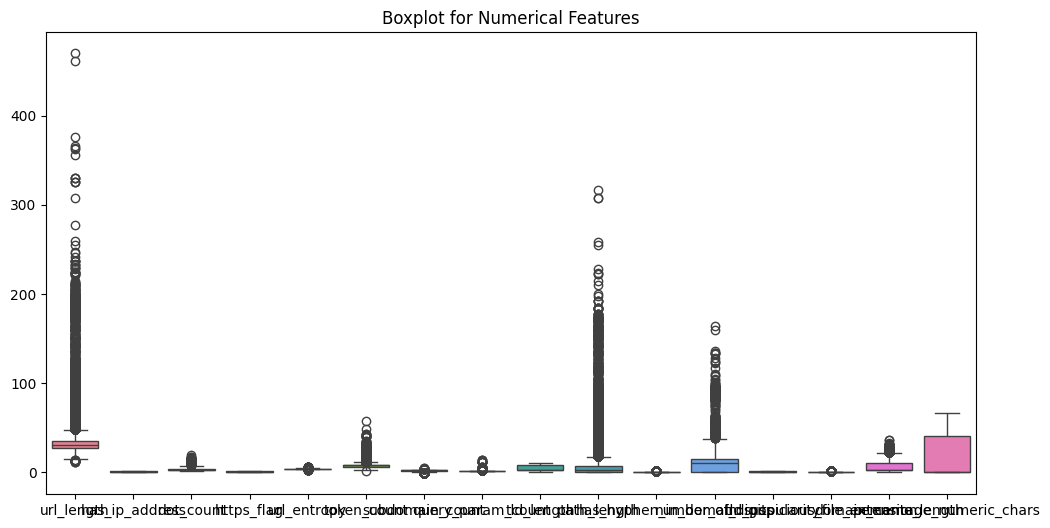

In [21]:
# outlier detection
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df.drop(['ClassLabel'], axis=1))
plt.title('Boxplot for Numerical Features')
plt.show()

In [22]:
# Checking Outliers untuk kolom numerik
def detect_outliers(column):
    if column.dtype in ['float64', 'int64']:  # tipe data numerik
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return len(outliers)
    return 0

outlier_counts = clean_df.apply(detect_outliers)
print("Jumlah Outlier:\n", outlier_counts)

Jumlah Outlier:
 url_length                   10808
has_ip_address                   0
dot_count                      137
https_flag                       0
url_entropy                   4616
token_count                   7779
subdomain_count               1109
query_param_count              369
tld_length                       0
path_length                  12322
has_hyphen_in_domain          3487
number_of_digits               364
tld_popularity                   0
suspicious_file_extension    11904
domain_name_length             428
percentage_numeric_chars         0
ClassLabel                       0
dtype: int64


## **OUTLIER = 0 dengan IQR**

In [24]:
#Handling Outlier menggunakan IQR
def replace_outliers_with_Q1_Q3(column):
    if column.dtype in ['float64', 'int64']:
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column = column.clip(lower=lower_bound, upper=upper_bound)  # Replace outliers
    return column

cleanout = clean_df.apply(replace_outliers_with_Q1_Q3)
cleanout.head()
cek_cleanout = cleanout.apply(detect_outliers)
print("Jumlah Outlier setelah penanganan:\n", cek_cleanout)

Jumlah Outlier setelah penanganan:
 url_length                   0
has_ip_address               0
dot_count                    0
https_flag                   0
url_entropy                  0
token_count                  0
subdomain_count              0
query_param_count            0
tld_length                   0
path_length                  0
has_hyphen_in_domain         0
number_of_digits             0
tld_popularity               0
suspicious_file_extension    0
domain_name_length           0
percentage_numeric_chars     0
ClassLabel                   0
dtype: int64


In [13]:
numerical_cols = df_train.columns
numerical_cols = numerical_cols.drop(['URL', 'ClassLabel'])

In [26]:
display(cleanout[numerical_cols].describe().T)
display(clean_df[numerical_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
url_length,80962.0,32.407018,7.504926,15.000000,27.000000,31.000000,35.000000,47.000000
has_ip_address,80962.0,0.485364,0.499789,0.000000,0.000000,0.000000,1.000000,1.000000
dot_count,80962.0,3.002334,0.899260,1.000000,2.000000,3.000000,4.000000,7.000000
https_flag,80962.0,0.405758,0.491041,0.000000,0.000000,0.000000,1.000000,1.000000
url_entropy,80962.0,3.969237,0.287269,3.275241,3.770942,3.937445,4.101410,4.597111
token_count,80962.0,7.540066,2.141356,2.367027,5.917567,8.000000,8.284594,11.835134
subdomain_count,80962.0,1.518373,0.600720,-0.500000,1.000000,2.000000,2.000000,3.500000
query_param_count,80962.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
tld_length,80962.0,5.003298,2.919133,0.000000,3.000000,3.000000,8.000000,10.000000
path_length,80962.0,5.707262,6.323435,0.000000,0.000000,2.000000,7.000000,17.500000


,count,mean,std,min,25%,50%,75%,max
url_length,80962.0,35.060337,16.760171,11.000000,27.000000,31.000000,35.000000,470.000000
has_ip_address,80962.0,0.485364,0.499789,0.000000,0.000000,0.000000,1.000000,1.000000
dot_count,80962.0,3.008980,0.947638,1.000000,2.000000,3.000000,4.000000,19.000000
https_flag,80962.0,0.405758,0.491041,0.000000,0.000000,0.000000,1.000000,1.000000
url_entropy,80962.0,3.976362,0.306563,2.521641,3.770942,3.937445,4.101410,5.871503
token_count,80962.0,7.739274,2.694977,1.600000,5.917567,8.000000,8.284594,57.600000
subdomain_count,80962.0,1.512166,0.626117,-1.000000,1.000000,2.000000,2.000000,5.000000
query_param_count,80962.0,1.010635,0.203350,1.000000,1.000000,1.000000,1.000000,14.000000
tld_length,80962.0,5.003298,2.919133,0.000000,3.000000,3.000000,8.000000,10.000000
path_length,80962.0,8.438769,14.495253,0.000000,0.000000,2.000000,7.000000,317.000000


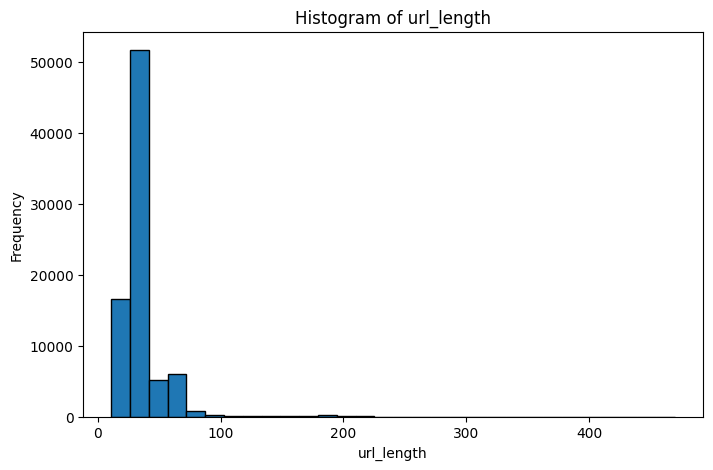

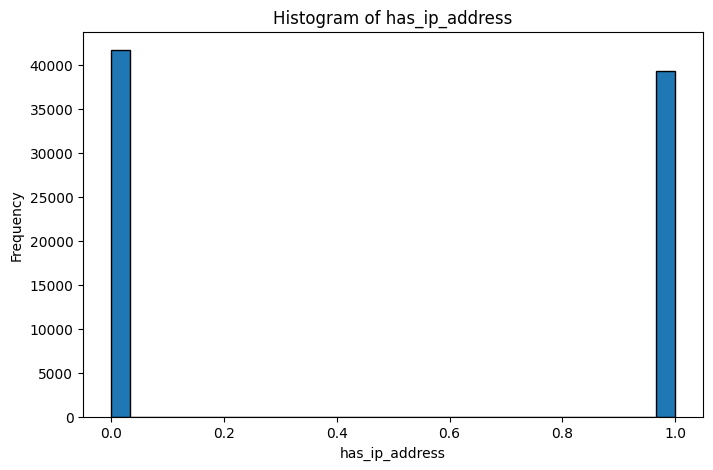

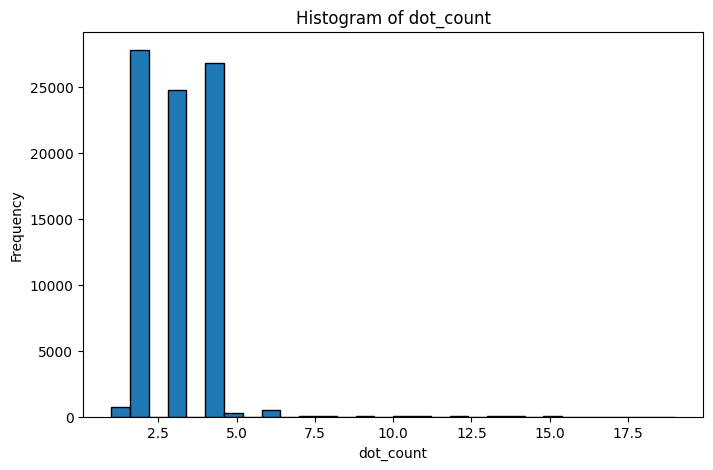

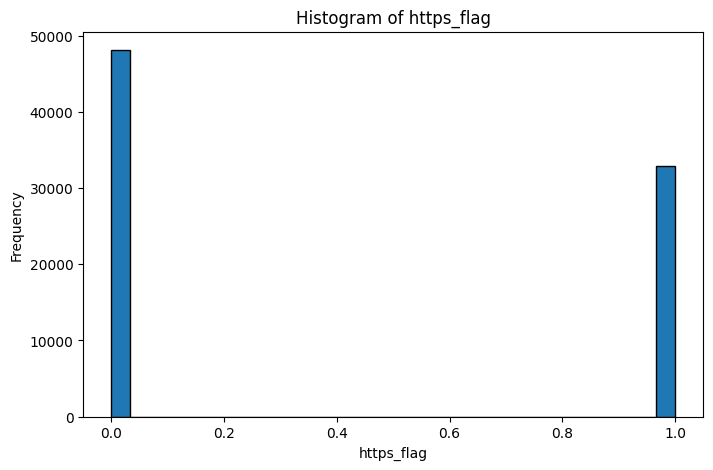

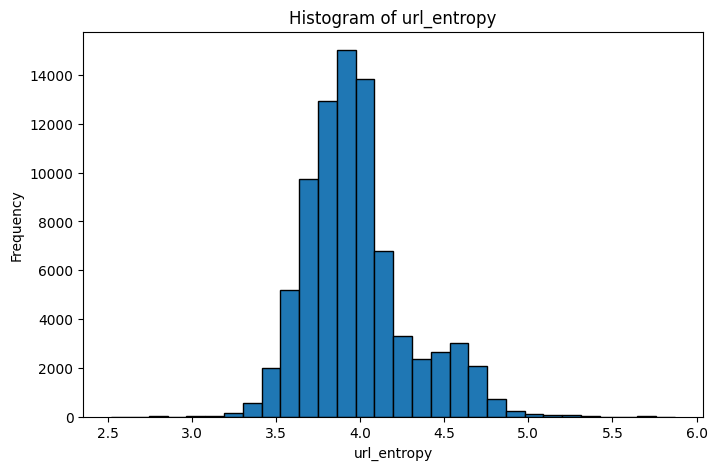

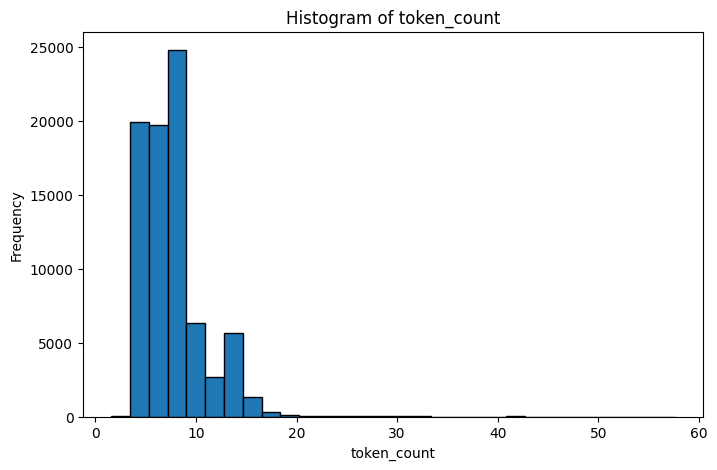

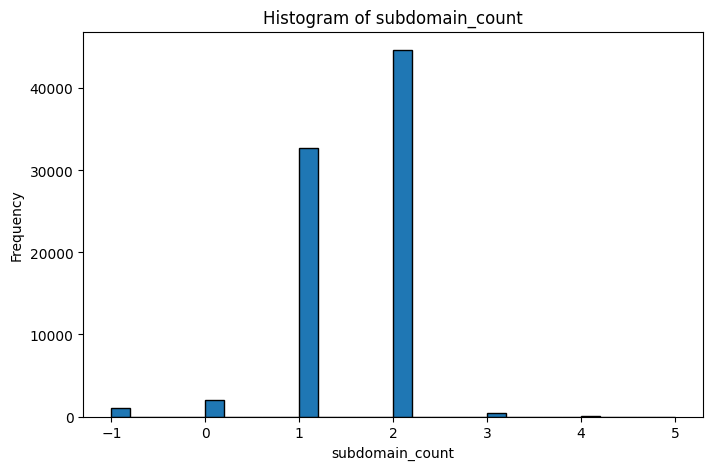

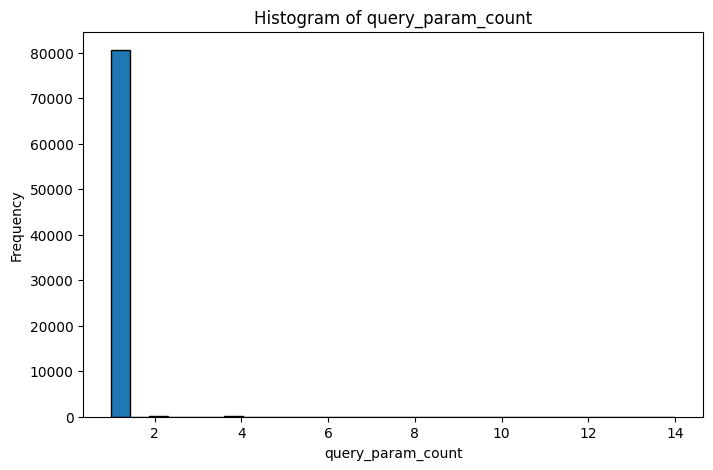

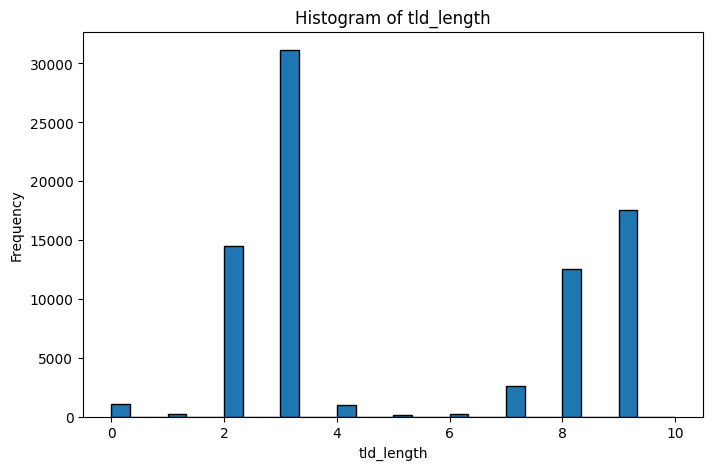

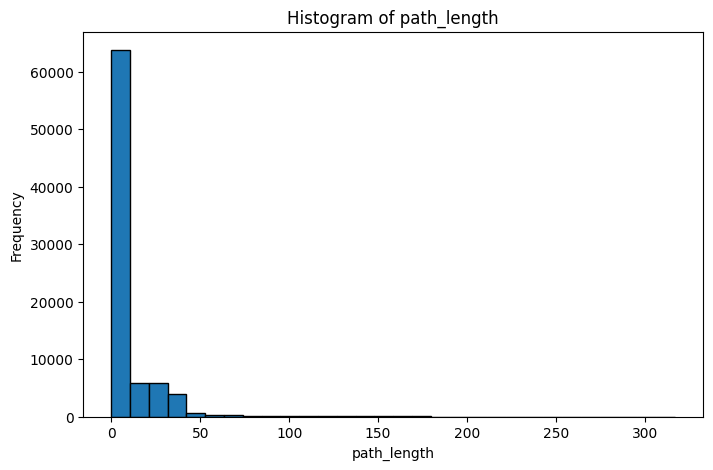

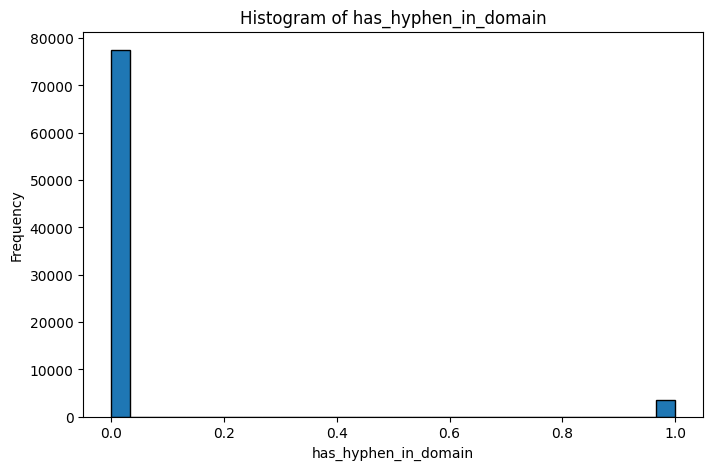

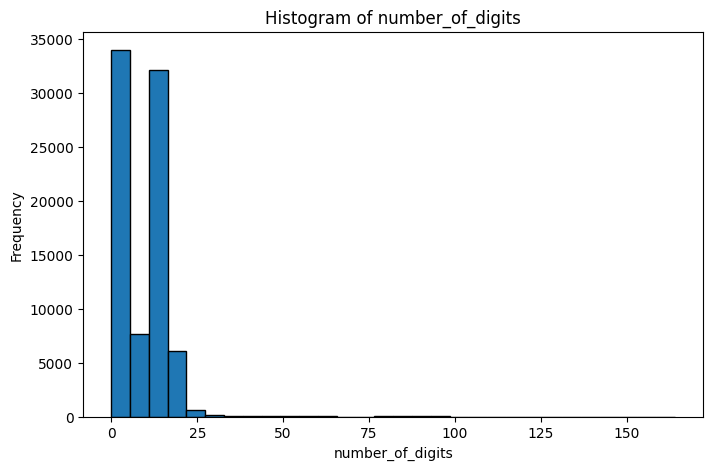

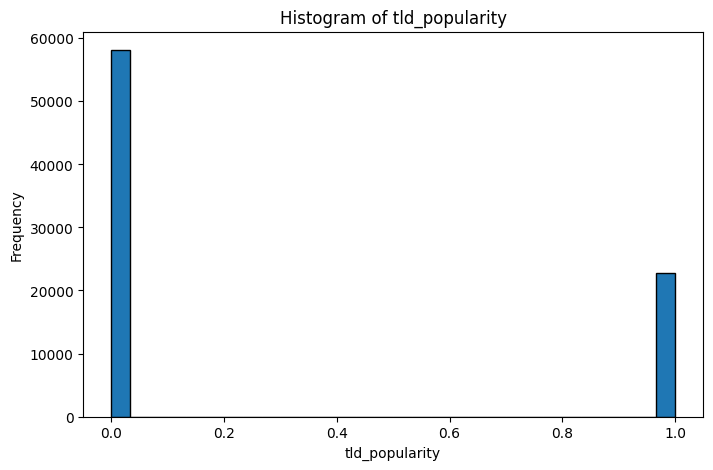

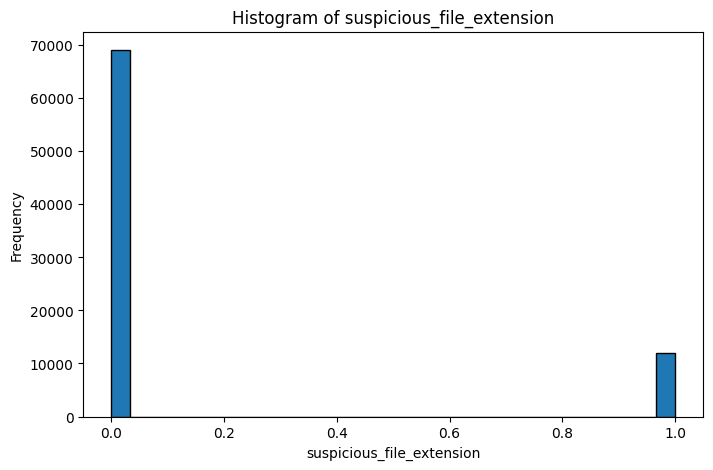

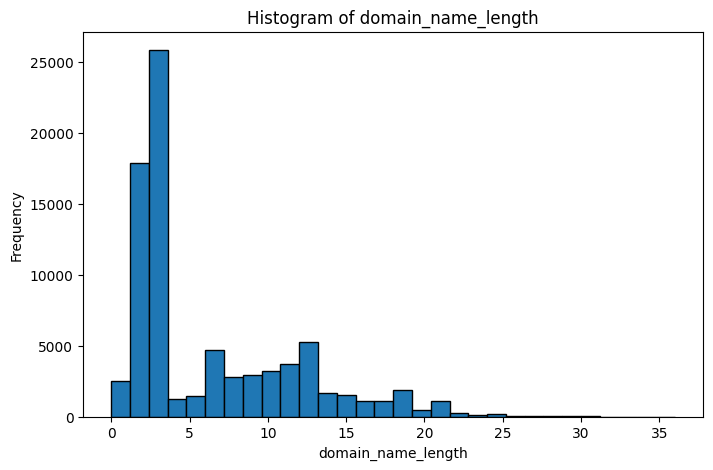

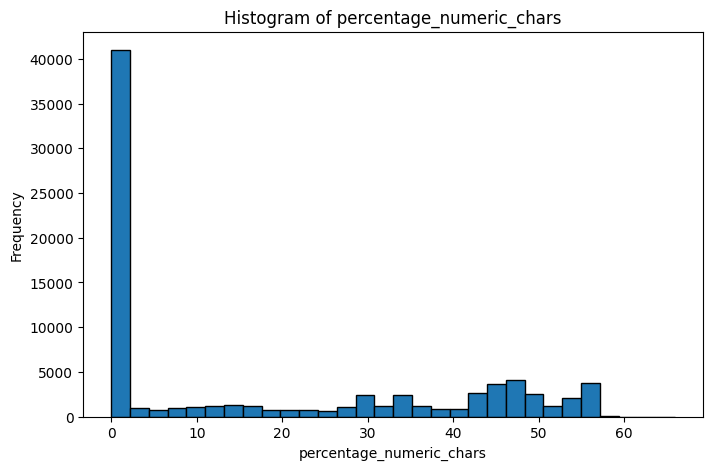

In [27]:
import matplotlib.pyplot as plt

# Create histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(clean_df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [28]:
# Skewness
skewed_cols = clean_df[numerical_cols].skew()

print("Skewness of numerical columns:")
display(skewed_cols)

Skewness of numerical columns:


url_length                    5.682858
has_ip_address                0.058572
dot_count                     1.416114
https_flag                    0.383854
url_entropy                   0.854291
token_count                   1.941775
subdomain_count              -1.050312
query_param_count            32.942348
tld_length                    0.341358
path_length                   4.688536
has_hyphen_in_domain          4.501555
number_of_digits              2.493008
tld_popularity                0.968712
suspicious_file_extension     1.993431
domain_name_length            1.216788
percentage_numeric_chars      0.586625
dtype: float64

In [29]:
# Skewness
skewed_cols = cleanout[numerical_cols].skew()

print("Skewness of numerical columns:")
display(skewed_cols)

Skewness of numerical columns:


url_length                   0.661021
has_ip_address               0.058572
dot_count                    0.315226
https_flag                   0.383854
url_entropy                  0.577179
token_count                  0.559520
subdomain_count             -0.779735
query_param_count            0.000000
tld_length                   0.341358
path_length                  0.841497
has_hyphen_in_domain         0.000000
number_of_digits             0.217755
tld_popularity               0.968712
suspicious_file_extension    0.000000
domain_name_length           1.154354
percentage_numeric_chars     0.586625
dtype: float64

In [30]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# log1p untuk fare
clean_df['DNL_log'] = np.log1p(clean_df['domain_name_length'])

# Power Transformer (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
clean_df['DNL_pt'] = pt.fit_transform(clean_df[['domain_name_length']])

print(clean_df[['domain_name_length','DNL_log','DNL_pt']].head())

   domain_name_length   DNL_log    DNL_pt
0                   3  1.386294 -0.481702
1                   2  1.098612 -0.962069
2                   3  1.386294 -0.481702
3                   2  1.098612 -0.962069
4                   3  1.386294 -0.481702
